In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

import datetime as dt
from datetime import datetime

In [98]:
data = pd.read_csv('../FlatWebCrawling/AllEligibleListings.csv')
data["Built year"] = pd.to_datetime(data["Built year"]).map(dt.datetime.toordinal)

In [99]:
train=data.sample(frac=0.8,random_state=200) #random state is a seed value
test=data.drop(train.index)
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('Price')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative.remove('href')

In [100]:
quantitative

['PricePerM2', 'Area', 'floor', 'Number of floors', 'Room count', 'Built year']

In [8]:
print(train.shape)
print(test.shape)

(4262, 12)
(0, 12)


In [9]:
missing = train.isnull().sum()

In [10]:
missing

Price               0
PricePerM2          0
Area                0
floor               0
Number of floors    0
Room count          0
Built year          0
Heating             0
Equipment           0
City                0
District            0
href                0
dtype: int64

## No missing data detected

C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


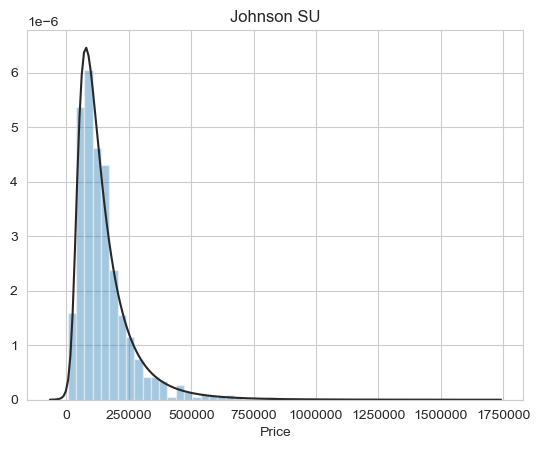

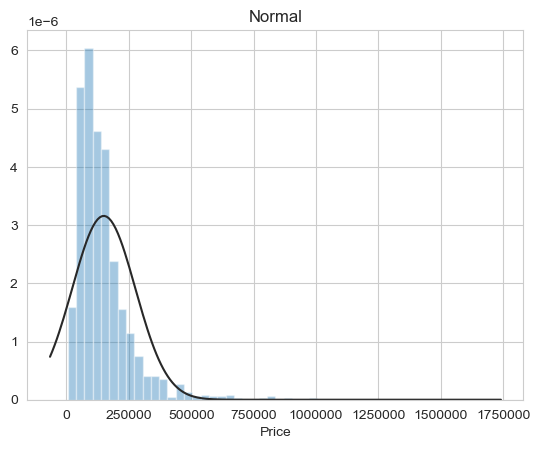

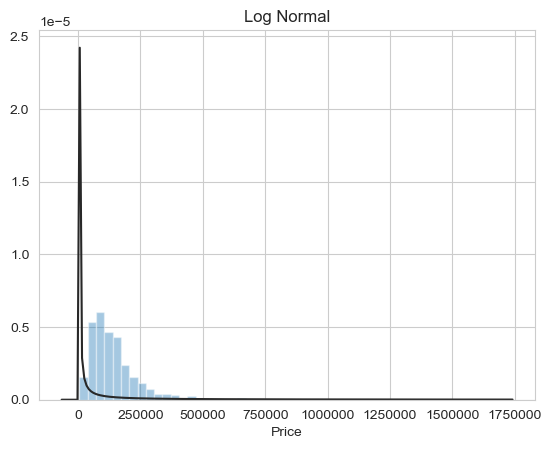

In [14]:
y = train['Price']
fig, ax = plt.subplots()
plt.figure(1); plt.title('Johnson SU')
sns.set_style("whitegrid")
sns.distplot(y, kde=False, fit=st.johnsonsu)
ax.ticklabel_format(style='plain', axis='x')

fig, ax = plt.subplots()
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
ax.ticklabel_format(style='plain', axis='x')

fig, ax = plt.subplots()
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

ax.ticklabel_format(style='plain', axis='x')
plt.show()


In [15]:
#test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
test_normality = lambda x: stats.shapiro(x.fillna(0))[1]
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.all())

True


In [16]:
normal

PricePerM2          1.483975e-41
Area                0.000000e+00
floor               0.000000e+00
Number of floors    0.000000e+00
Room count          0.000000e+00
Built year          1.667545e-43
dtype: float64

In [17]:
stats.shapiro(train[quantitative]["PricePerM2"])

ShapiroResult(statistic=0.9263899326324463, pvalue=1.4839750737199813e-41)

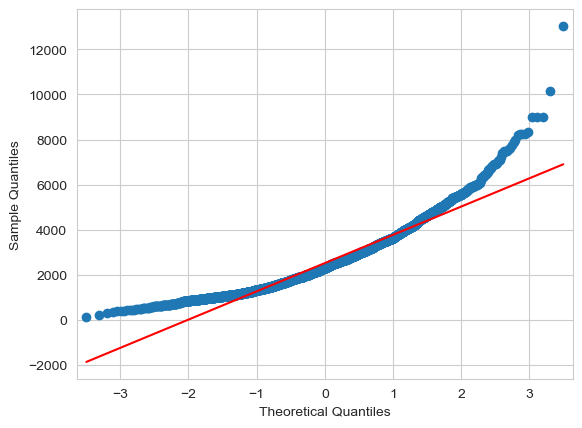

In [18]:
import statsmodels.api as sm
fig = sm.qqplot(train[quantitative]["PricePerM2"],line='s')
plt.show()

We can see from Q-Q plot that indeed, PricePerM2 is not normaly distributed

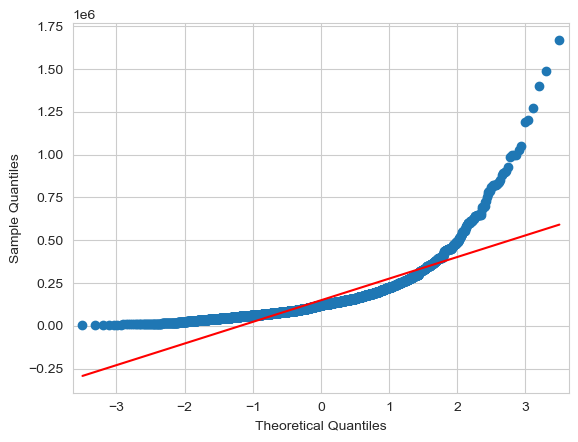

In [19]:
import statsmodels.api as sm
fig = sm.qqplot((train["Price"]),line='s')
plt.show()

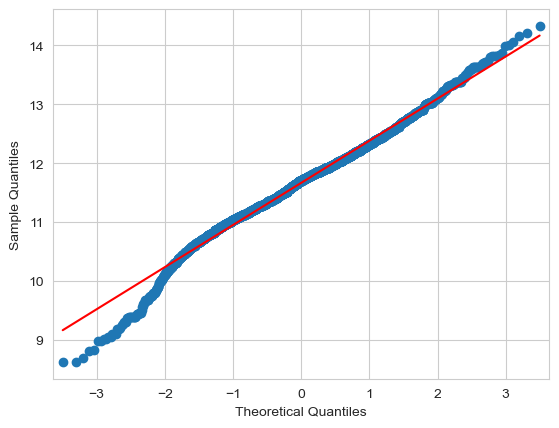

In [20]:
import statsmodels.api as sm
fig = sm.qqplot(np.log(train["Price"]),line='s')
plt.show()

In [21]:
stats.shapiro(np.log(train["Price"]))

ShapiroResult(statistic=0.9877012372016907, pvalue=8.068594215408023e-19)

C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


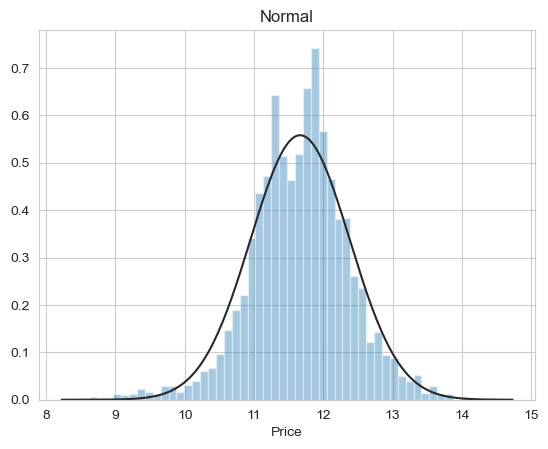

In [22]:
fig, ax = plt.subplots()
plt.figure(1); plt.title('Normal')
sns.distplot(np.log(train["Price"]), kde=False, fit=st.norm)
ax.ticklabel_format(style='plain', axis='x')

C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

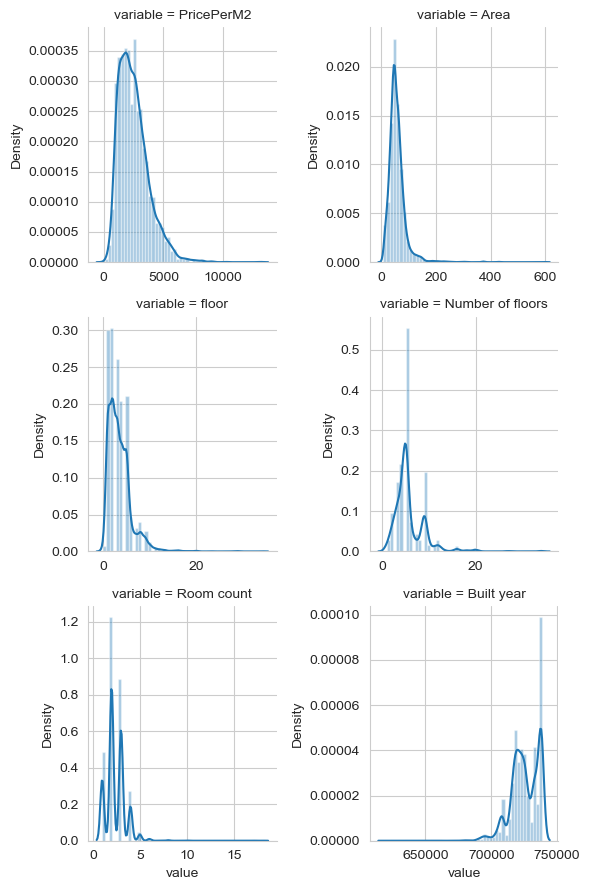

In [23]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [24]:
f

variable     value
0      PricePerM2    1313.0
1      PricePerM2    1847.0
2      PricePerM2    1835.0
3      PricePerM2    1049.0
4      PricePerM2    1603.0
...           ...       ...
25567  Built year  736695.0
25568  Built year  737791.0
25569  Built year  738156.0
25570  Built year  726468.0
25571  Built year  735599.0

[25572 rows x 2 columns]

C:\Users\Paulius\Anaconda3\envs\Python_3_10_6\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


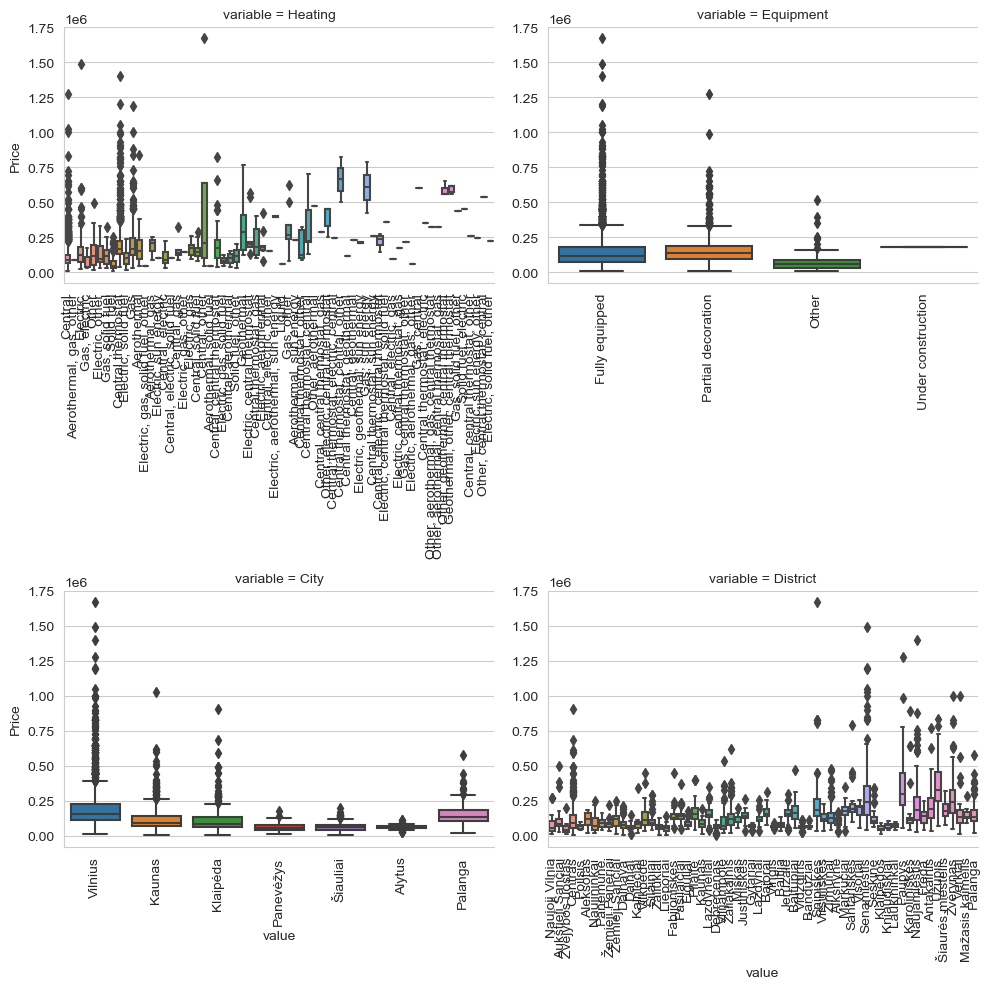

In [25]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['Price'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Price")

In [26]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['Price'].values
            #samples t
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [27]:
#train["District"].unique()

In [28]:
a = anova(train)
a
#a['disparity'] = a['pval'].values
#sns.barplot(data=a, x='feature', y='disparity')
#x=plt.xticks(rotation=90)

feature           pval
3   District  9.244661e-288
0    Heating  3.445546e-180
2       City  1.032608e-135
1  Equipment   5.024991e-07

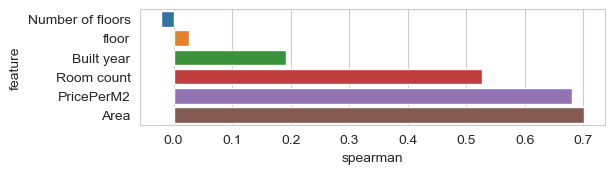

In [29]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Price']) for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative
spearman(train, features)

<AxesSubplot:>

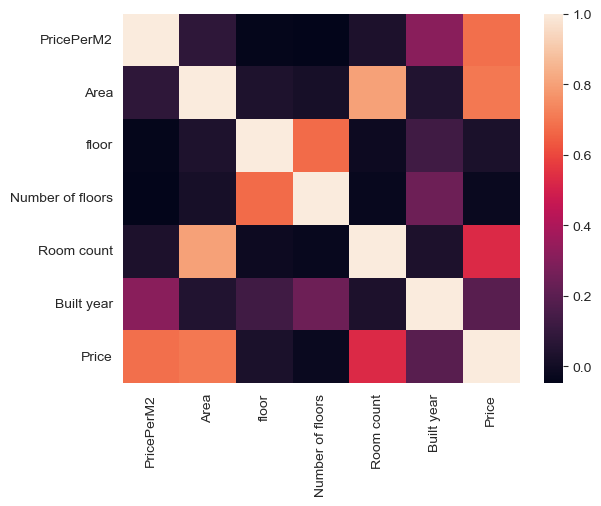

In [30]:
plt.figure(1)
corr = train[quantitative+['Price']].corr()
sns.heatmap(corr)


In [31]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [32]:
features = quantitative
#x = train[features].values
x = pd.get_dummies(data=train[[*quantitative,'Heating','Equipment']], drop_first=True).values
y = train['Price'].values
model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
r_sq

0.8943874042199187

In [33]:
qualitative

['Heating', 'Equipment', 'City', 'District']

In [34]:
pd.get_dummies(data=train[[*quantitative,'Heating','Equipment']], drop_first=True)

PricePerM2   Area  floor  Number of floors  Room count  Built year  \
0           1313  73.11      9                 9           4      726103   
1           1847  33.30      6                 6           2      725007   
2           1835  81.75      5                 5           5      724276   
3           1049  81.00      1                 2           2      689944   
4           1603  28.69      4                 4           1      719163   
...          ...    ...    ...               ...         ...         ...   
4257        4600  25.00      1                 4           1      736695   
4258        6088  38.60      1                 3           2      737791   
4259        3143  42.00      2                 3           3      738156   
4260        3200  50.00      5                 6           2      726468   
4261        2750  30.00      3                 3           2      735599   

      Heating_Aerothermal, gas  Heating_Aerothermal, gas, other  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                1   
4                            0                                0   
...                        ...                              ...   
4257                         0                                0   
4258                         0                                0   
4259                         0                                0   
4260                         0                                0   
4261                         0                                0   

      Heating_Aerothermal, solid fuel  Heating_Aerothermal, sun energy  ...  \
0                                   0                                0  ...   
1                                   0                                0  ...   
2                                   0                                0  ...   
3                                   0                                0  ...   
4                                   0                                0  ...   
...                               ...                              ...  ...   
4257                                0                                0  ...   
4258                                0                                0  ...   
4259                                0                                0  ...   
4260                                0                                0  ...   
4261                                0                                0  ...   

      Heating_Other, aerothermal, gas, central thermostat  \
0                                                     0     
1                                                     0     
2                                                     0     
3                                                     0     
4                                                     0     
...                                                 ...     
4257                                                  0     
4258                                                  0     
4259                                                  0     
4260                                                  0     
4261                                                  0     

      Heating_Other, central thermostat, central  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
4257                                           0   
4258                                           0   
4259                                           0   
4260                                           0   
4261                              

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [72]:
#build our model
modelNN = Sequential()
modelNN.add(Dense(74, activation='relu', kernel_initializer='HeNormal'))
modelNN.add(Dense(100, activation='relu', kernel_initializer='HeNormal'))
modelNN.add(Dense(100, activation='relu', kernel_initializer='HeNormal'))
modelNN.add(Dense(50, activation='relu', kernel_initializer='HeNormal'))
modelNN.add(Dense(1))

modelNN.compile(loss='mean_squared_error', optimizer='adam')

In [102]:
X = pd.get_dummies(data=train[[*quantitative,'Heating','Equipment']], drop_first=True).values
len(X[0])

74

In [74]:
from sklearn import preprocessing
X = pd.get_dummies(data=train[['Heating','Equipment']], drop_first=True).values
X = np.append(X, preprocessing.normalize(train[[*quantitative]]), axis=1)
Y = train['Price'].values

In [76]:
pd.options.display.max_rows = 10
# Train the model
modelNN.fit(
    X,
    Y,
    epochs=10000
);

Epoch 1/10000
134/134 [==============================] - 1s 1ms/step - loss: 37800136704.0000
Epoch 2/10000
134/134 [==============================] - 0s 1ms/step - loss: 20001542144.0000
Epoch 3/10000
134/134 [==============================] - 0s 1ms/step - loss: 14891781120.0000
Epoch 4/10000
134/134 [==============================] - 0s 1ms/step - loss: 14252697600.0000
Epoch 5/10000
134/134 [==============================] - 0s 1ms/step - loss: 13925578752.0000
Epoch 6/10000
134/134 [==============================] - 0s 1ms/step - loss: 13710450688.0000
Epoch 7/10000
134/134 [==============================] - 0s 1ms/step - loss: 13583247360.0000
Epoch 8/10000
134/134 [==============================] - 0s 1ms/step - loss: 13474832384.0000
Epoch 9/10000
134/134 [==============================] - 0s 1ms/step - loss: 13421290496.0000
Epoch 10/10000
134/134 [==============================] - 0s 1ms/step - loss: 13306970112.0000
Epoch 11/10000
134/134 [==============================] - 0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



134/134 [==============================] - 0s 1ms/step - loss: 181155136.0000
Epoch 5807/10000
134/134 [==============================] - 0s 1ms/step - loss: 259430208.0000
Epoch 5808/10000
134/134 [==============================] - 0s 1ms/step - loss: 162811664.0000
Epoch 5809/10000
134/134 [==============================] - 0s 1ms/step - loss: 257129152.0000
Epoch 5810/10000
134/134 [==============================] - 0s 1ms/step - loss: 215946592.0000
Epoch 5811/10000
134/134 [==============================] - 0s 1ms/step - loss: 167598624.0000
Epoch 5812/10000
134/134 [==============================] - 0s 1ms/step - loss: 167732224.0000
Epoch 5813/10000
134/134 [==============================] - 0s 1ms/step - loss: 162250288.0000
Epoch 5814/10000
134/134 [==============================] - 0s 1ms/step - loss: 119426856.0000
Epoch 5815/10000
134/134 [==============================] - 0s 1ms/step - loss: 129513344.0000
Epoch 5816/10000
134/134 [==============================] - 0s 1ms/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



134/134 [==============================] - 0s 1ms/step - loss: 116430328.0000
Epoch 8519/10000
134/134 [==============================] - 0s 1ms/step - loss: 95670072.0000
Epoch 8520/10000
134/134 [==============================] - 0s 1ms/step - loss: 91434520.0000
Epoch 8521/10000
134/134 [==============================] - 0s 1ms/step - loss: 116251664.0000
Epoch 8522/10000
134/134 [==============================] - 0s 1ms/step - loss: 107962816.0000
Epoch 8523/10000
134/134 [==============================] - 0s 1ms/step - loss: 125876416.0000
Epoch 8524/10000
134/134 [==============================] - 0s 1ms/step - loss: 115712032.0000
Epoch 8525/10000
134/134 [==============================] - 0s 1ms/step - loss: 81109824.0000
Epoch 8526/10000
134/134 [==============================] - 0s 1ms/step - loss: 146968768.0000
Epoch 8527/10000
134/134 [==============================] - 0s 1ms/step - loss: 107758872.0000
Epoch 8528/10000
134/134 [==============================] - 0s 1ms/ste

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [70]:
city = "Kaunas"
district = "Aleksotas"

In [116]:
#df = train[(train["City"] == city) & (train["District"] == district)]
#actualPrice = data.Price
#X = pd.get_dummies(data=df[['Heating','Equipment']], drop_first=True).values
#X = np.append(X, preprocessing.normalize(df[[*quantitative]]), axis=1)

pricePrediction = data
X = pd.get_dummies(data=pricePrediction[['Heating','Equipment']], drop_first=True).values
X = np.append(X, preprocessing.normalize(pricePrediction[[*quantitative]]), axis=1)

predictedPrice = modelNN.predict(X).flatten()
predictedLosses = actualPrice - predictedPrice
pricePrediction["Losses"] = predictedLosses
pricePrediction["PredictedPrice"] = predictedPrice
pricePrediction = pricePrediction.sort_values(by=['Losses'])
#pricePrediction["Built year"] = pd.to_datetime(pricePrediction["Built year"]).map(dt.datetime.fromordinal)
pricePrediction["Year Built"] = pricePrediction["Built year"].apply(lambda x: datetime.fromordinal(x).strftime('%Y-%m-%d'))
pricePrediction.drop("Built year", axis = 1).head()

134/134 [==============================] - 0s 735us/step


Price  PricePerM2    Area  floor  Number of floors  Room count  \
3328  755000        4081  185.00      2                 4           5   
2257  123000        3981   30.90      2                 5           1   
4211  235000        4700   50.00      1                 2           2   
3474  249900        3602   69.37      8                11           2   
3845  470000        3790  124.00      1                 2           5   

                                  Heating       Equipment     City  \
3328                   Central thermostat  Fully equipped  Vilnius   
2257            Central thermostat, other  Fully equipped  Vilnius   
4211                           Gas, other  Fully equipped  Palanga   
3474  Other, electric, central thermostat  Fully equipped  Vilnius   
3845                                  Gas  Fully equipped  Vilnius   

          District                                               href  \
3328  Naujamiestis  https://en.aruodas.lt/butai-vilniuje-naujamies...   
2257     Baltupiai  https://en.aruodas.lt/butai-vilniuje-baltupiuo...   
4211       Palanga  https://en.aruodas.lt/butai-palangoje-sermiesc...   
3474  Naujamiestis  https://en.aruodas.lt/butai-vilniuje-naujamies...   
3845   Senamiestis  https://en.aruodas.lt/butai-vilniuje-senamiest...   

           Losses  PredictedPrice  Year Built  
3328 -48737.12500    803737.12500  1900-01-01  
2257 -43694.06250    166694.06250  2021-01-01  
4211 -43577.34375    278577.34375  2022-01-01  
3474 -41748.09375    291648.09375  2009-01-01  
3845 -38852.37500    508852.37500  1890-01-01

In [121]:
pd.options.display.max_colwidth = 200
print(pricePrediction.drop("Built year", axis = 1).head().href)

3328       https://en.aruodas.lt/butai-vilniuje-naujamiestyje-gedimino-pr-namo-isore-artimiausiu-metu-turetu-buti-1-3219504/
2257     https://en.aruodas.lt/butai-vilniuje-baltupiuose-jeronimo-ralio-g-parduodamas-naujas-puikiai-irengtas-15-1-3249067/
4211                         https://en.aruodas.lt/butai-palangoje-sermiescio-g-parduodamas-2-kam-butas-palangoje-1-3251455/
3474    https://en.aruodas.lt/butai-vilniuje-naujamiestyje-smolensko-g-paruodamas-pilnai-irengtas-labai-erdvus-ir-1-3249407/
3845      https://en.aruodas.lt/butai-vilniuje-senamiestyje-bernardinu-g-butas-senamiescio-sirdyje-salia-gedimino-1-3251275/
Name: href, dtype: object
